In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [22]:
path = r"C:\Users\PMLS\ml\DNN_1.ipynb"

In [24]:
df = pd.read_csv('Churn_Modelling.csv')

In [26]:
df.shape

(10000, 14)

In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
df['Exited'].value_counts()  # inbalance data set

Exited
0    7963
1    2037
Name: count, dtype: int64

In [32]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [34]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [38]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [40]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.shape

(10000, 11)

In [44]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)   # data became numeric

In [46]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [48]:
X = df.drop(columns=['Exited'])       
y = df['Exited'].values

In [50]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [52]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) # 20 % for testing 

In [56]:
X_train.shape

(8000, 11)

In [58]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False


In [60]:
from sklearn.preprocessing import StandardScaler    # do scaling for fast convergence 
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [62]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [64]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [66]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))    # ist hidden layer recieving 11 features
model.add(Dense(1,activation='sigmoid'))            # output layer have one output nodes

#model.add(Dense(11,activation='sigmoid',input_dim=11))   
#model.add(Dense(11,activation='sigmoid'))


C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])    # Model Complition include optimzer, loss etc

In [72]:
model.fit(X_train_trf,y_train,epochs=15)

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7958 - loss: 0.5271
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7967 - loss: 0.5178
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.5105
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7978 - loss: 0.5001
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7900 - loss: 0.5037
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7929 - loss: 0.4968
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7990 - loss: 0.4827
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7951 - loss: 0.4808
Epoch 9/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7991 - loss: 0.4742
Epoch 10/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7972 - loss: 0.4699
Epoch 11/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7958 - loss: 0.4680
Epoch 12/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [ ]:
model.layers[0].get_weights()  # to check weight

In [ ]:
y_pred = model.predict(X_test_trf)   # predicated value is not zero or 1 due to sigmoid function

In [ ]:
y_pred

In [ ]:

y_binary=np.where(y_pred>0.5,1,0)

In [ ]:
y_binary

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_binary)

In [ ]:

#Fine tunning
model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))    # ist hidden layer recieving 11 features
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))            # output layer have one output nodes



In [ ]:
model.summary()

In [215]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])  

In [118]:
history= model.fit(X_train_trf,y_train,epochs=105, validation_split=0.2)  # store data in history

Epoch 1/105
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7906 - loss: 0.5430 - val_accuracy: 0.7969 - val_loss: 0.4935
Epoch 2/105
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4827 - val_accuracy: 0.7969 - val_loss: 0.4723
Epoch 3/105
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4638 - val_accuracy: 0.7969 - val_loss: 0.4500
Epoch 4/105
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.4480 - val_accuracy: 0.8019 - val_loss: 0.4377
Epoch 5/105
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8051 - loss: 0.4353 - val_accuracy: 0.8094 - val_loss: 0.4330
Epoch 6/105
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.4277 - val_accuracy: 0.8106 - val_loss: 0.4311
Epoch 7/105
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.4219 - val_accuracy: 0.8056 - val_loss: 0.4303
Epoch 8/105
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8128 - loss: 0.4249 - val_accu

In [120]:
history.history

{'accuracy': [0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7979687452316284,
  0.8062499761581421,
  0.8096874952316284,
  0.8101562261581421,
  0.8115624785423279,
  0.813281238079071,
  0.8167187571525574,
  0.8187500238418579,
  0.8190624713897705,
  0.8240625262260437,
  0.8253124952316284,
  0.8271874785423279,
  0.8298437595367432,
  0.8307812213897705,
  0.832812488079071,
  0.8357812762260437,
  0.8368750214576721,
  0.8385937213897705,
  0.8393750190734863,
  0.8421875238418579,
  0.8432812690734863,
  0.842968761920929,
  0.8448437452316284,
  0.8462499976158142,
  0.8479687571525574,
  0.8500000238418579,
  0.8489062786102295,
  0.8512499928474426,
  0.8510937690734863,
  0.8551562428474426,
  0.8537499904632568,
  0.8557812571525574,
  0.8553125262260437,
  0.856249988079071,
  0.8573437333106995,
  0.8587499856948853,
  0.8595312237739563,
  0.8573437333106995,
  0.860156238079071,
  0.8596875071525574,
  0.8598437309265137,
  0.8614062666893005,
  0

In [122]:
import matplotlib.pyplot as plt

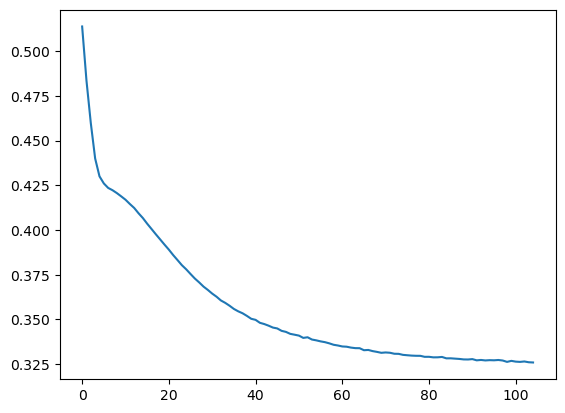

In [124]:
plt.plot(history.history['loss'])

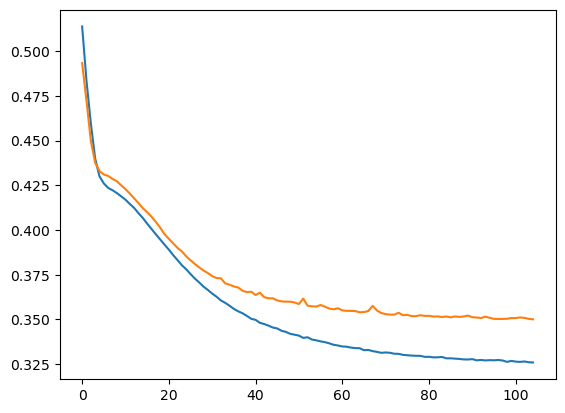

In [126]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

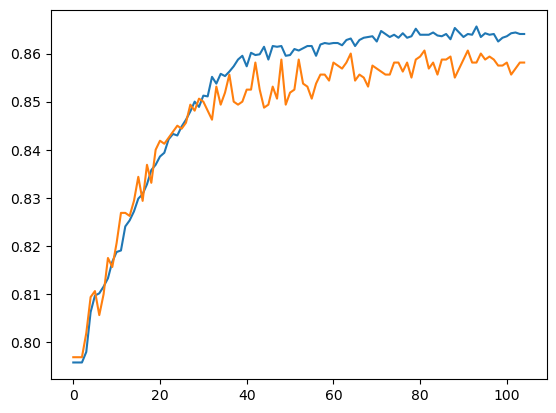

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])